# Online Retail II Customer Segmentation

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

This data was obtained from here https://archive.ics.uci.edu/dataset/502/online+retail+ii

**Features information**
- `InvoiceNo`: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- `StockCode`: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
- `Description`: Product (item) name. Nominal. 
- `Quantity`: The quantities of each product (item) per transaction. Numeric.	
- `InvoiceDate`: Invice date and time. Numeric. The day and time when a transaction was generated. 
- `UnitPrice`: Unit price. Numeric. Product price per unit in sterling (Â£). 
- `CustomerID`: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 
- `Country`: Country name. Nominal. The name of the country where a customer resides.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = "{:20.2f}".format
# Show all columns on output
pd.set_option("display.max_columns", 999)

## Data Exploration

In [2]:
df = pd.read_excel("./online_retail_II.xlsx", sheet_name=0)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [5]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df["Customer ID"].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [7]:
# Letter C in front of invoice number means "Cancel order"
df[df["Quantity"] < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


In [8]:
# Take a look at Invoice column
df["Invoice"] = df["Invoice"].astype(str)
df[df["Invoice"].str.match("^\\d{6}$") == False].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


In [9]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [10]:
# Take a look at "A" invoice
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
# Check if there is any StockCode that is not 5-digit number
df["StockCode"] = df["StockCode"].astype(str)
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [12]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


## Data Cleaning

In [13]:
cleaned_df = df.copy()

In [14]:
# Cleared out the invoice that not 6 digit code
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype(str)
cleaned_df = cleaned_df[cleaned_df["Invoice"].str.match("^\\d{6}$")]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [15]:
# Cleared out the StockCode using mask
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype(str)
stock_filter = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) |
    (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) |
    (cleaned_df["StockCode"].str.match("^PADS$") == True) 
)
cleaned_df = cleaned_df[stock_filter]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [16]:
# Drop null values inside Customer ID column
cleaned_df.dropna(subset="Customer ID", inplace=True)

In [17]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [18]:
# Exclude 0 price items
print("N items with 0 price: ", len(cleaned_df[cleaned_df["Price"] == 0]))
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

N items with 0 price:  28


In [19]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00,406309,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [20]:
cleaned_df["Price"].min()

0.001

In [21]:
# Calculate the number of data dropped
len(cleaned_df) / len(df)

0.7732429238325965

There is about 23% of the original data were dropped.

## Feature Engineering

In [22]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [23]:
aggregated_df = cleaned_df.groupby("Customer ID", as_index=False).agg(MonetaryValue=("SalesLineTotal", "sum"),
                                                                      Frequency=("Invoice", "nunique"),
                                                                      LastInvoiceDate=("InvoiceDate", "max")
                                                                      ) 

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [24]:
# Add recency column to identify how many days since the last purchase
max_invoice_date = aggregated_df["LastInvoiceDate"].max()
print("Assume today as the latest order time: ", max_invoice_date)

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df.head()

Assume today as the latest order time:  2010-12-09 20:01:00


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


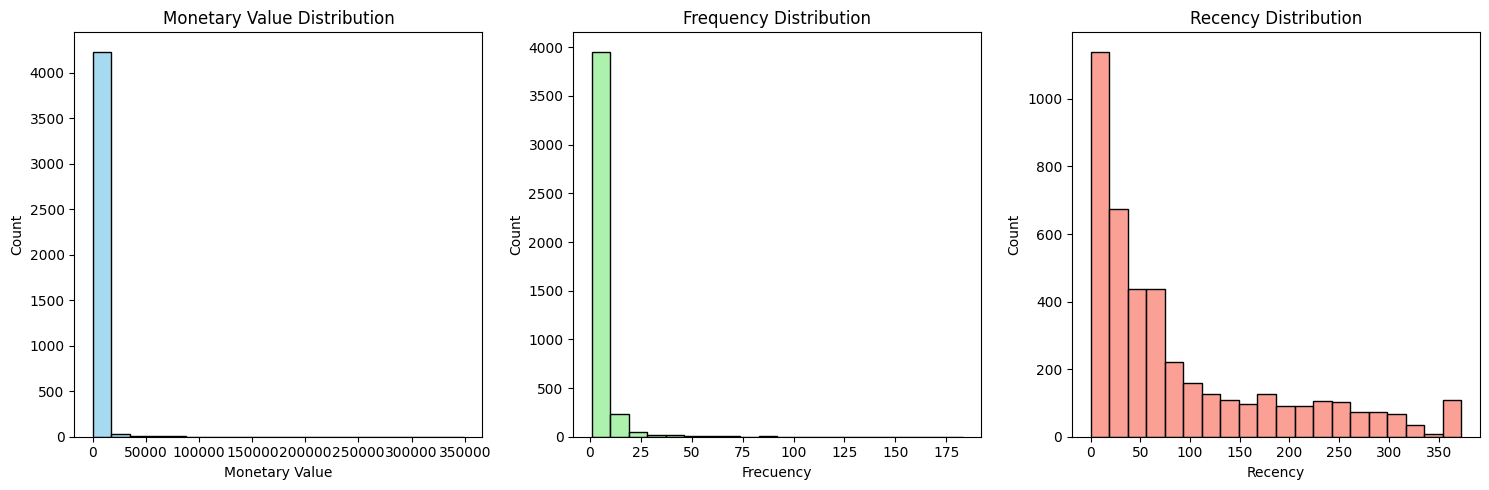

In [25]:
# Plot histogram
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(aggregated_df["MonetaryValue"], bins=20, color="skyblue", edgecolor="black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
sns.histplot(aggregated_df["Frequency"], bins=20, color="lightgreen", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Frecuency")
plt.ylabel("Count")

plt.subplot(1, 3, 3)
sns.histplot(aggregated_df["Recency"], bins=20, color="salmon", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

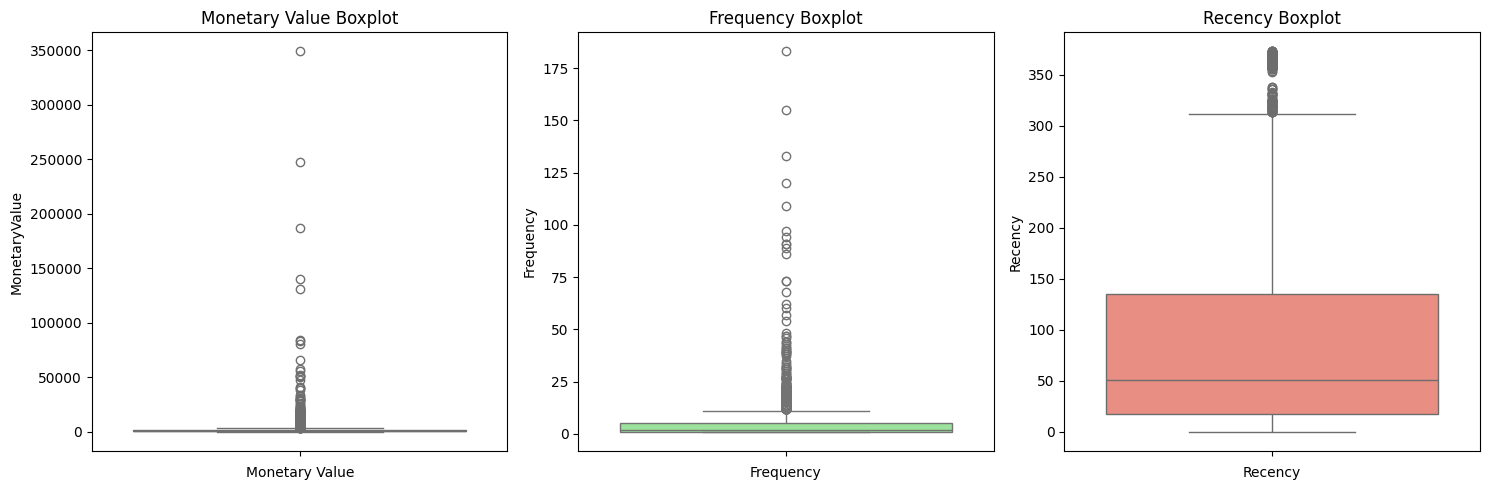

In [26]:
# Boxplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(aggregated_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 2)
sns.boxplot(aggregated_df["Frequency"], color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_df["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

In [27]:
# Get outliers in Monetary Value column
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [28]:
# Get outliers in Frequency column
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [29]:
# Non-outlier data
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


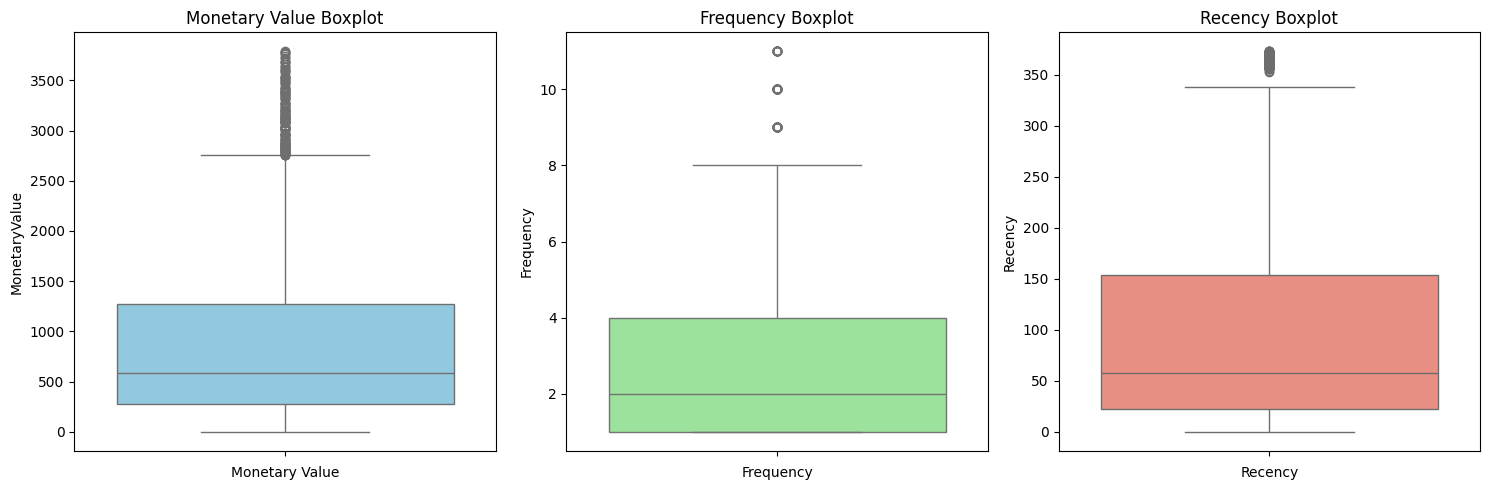

In [30]:
# Replot the boxplot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(non_outliers_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary Value")

plt.subplot(1, 3, 2)
sns.boxplot(non_outliers_df["Frequency"], color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1, 3, 3)
sns.boxplot(non_outliers_df["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

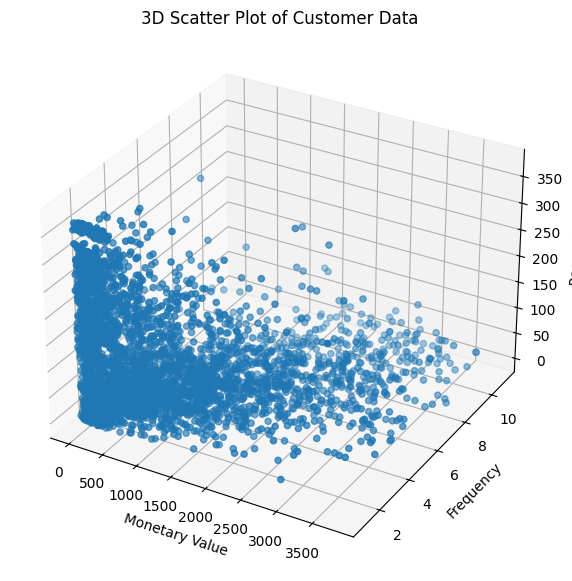

In [31]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d")

ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")
plt.show()

The plot consists of numerous scattered points, suggesting that most customers have lower monetary value and frequency, while fewer customers exhibit high spending and frequent purchases. The distribution appears dense at lower values and more sparse as values increase.

However, the scale are different for the three features which is bad for clustering. Therefore, we will perform standard scaler to convert all the data into the same numerical range with mean of 0 and standard deviation of 1.

In [32]:
# Scale the features
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=["MonetaryValue", "Frequency", "Recency"])
scaled_data_df.head()

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89


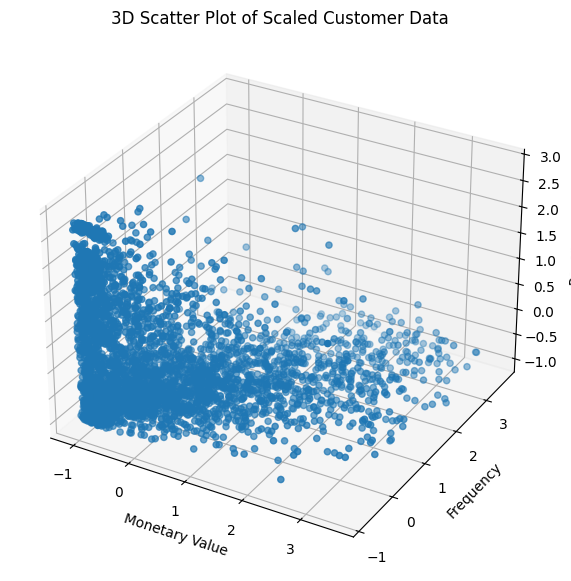

In [33]:
# Replot the data
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d")

ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Scaled Customer Data")
plt.show()

## KMeans Clustering
We're going to use elbow method to determine the optimal number of clusters. It helps identify the point where adding more clusters does not significantly improve the within-cluster sum of squares (WCSS).

We also going to use silhoutte score to determine which k is the optimum number of cluster.The Silhouette Score is a metric used to evaluate clustering performance. It measures how similar a data point is to its assigned cluster compared to other clusters. Higher score is good and lower score indicates a lot of overlap in the culters.

In [34]:
max_k = 12
inertia = {}
silhoutte_scores = {}

for k in range(2, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, cluster)
    inertia[k] = kmeans.inertia_
    silhoutte_scores[k] = sil_score

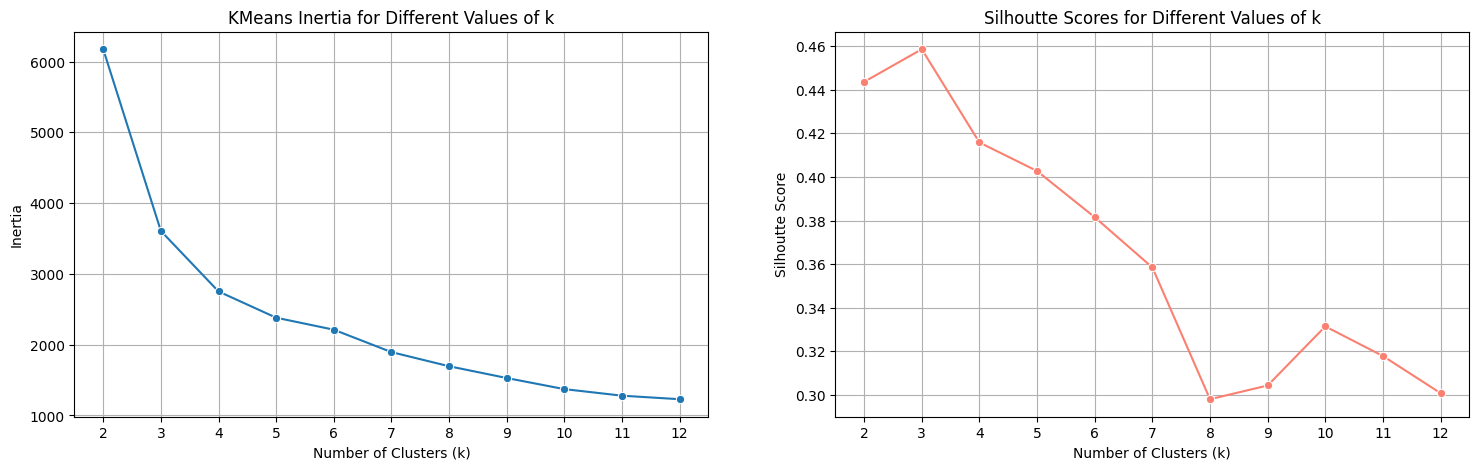

In [35]:
# Plot the number of k and silhoutte value
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x=inertia.keys(), y=inertia.values(), marker="o")
plt.title("KMeans Inertia for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(list(inertia.keys()))
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(x=silhoutte_scores.keys(), y=silhoutte_scores.values(), marker="o", color="salmon")
plt.title("Silhoutte Scores for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhoutte Score")
plt.xticks(list(silhoutte_scores.keys()))
plt.grid(True)

The inertia decreases sharply up to k = 4 and than starts to level off. This suggests that adding more clusters beyond 4 does not sinificantly reduce inertia. The highest silhoutte score occurs at k = 3. The score declines after 3, meaning adding more clusters reduces cluster quality. 
However, in this case we will use k = 4 to get finer segmentation considering the low inertia score with relatively high silhoutte score.

In [36]:
# Final model
kmeans_optimal = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_optimal = kmeans_optimal.fit_predict(scaled_data)
cluster_optimal

array([1, 0, 2, ..., 1, 0, 0])

In [37]:
non_outliers_df["Cluster"] = cluster_optimal
non_outliers_df.head()

C:\Users\kulin\AppData\Local\Temp\ipykernel_3804\262008146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_optimal


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2


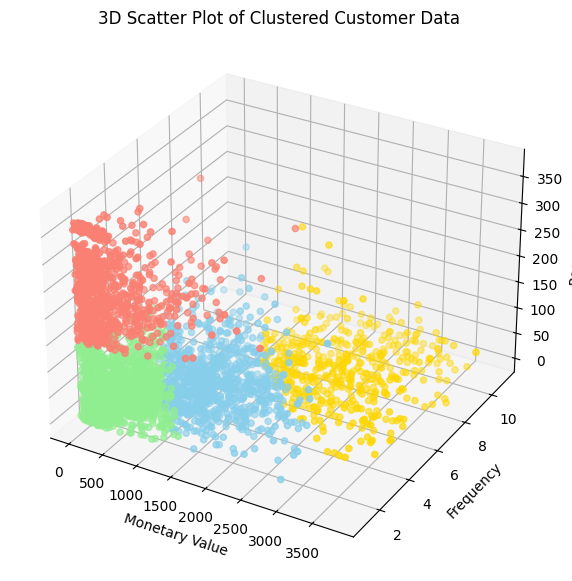

In [38]:
# Replot the data with cluster visualized
color_map = {
    0: "skyblue",
    1: "salmon",
    2: "lightgreen",
    3: "gold"
}

cluster_color = non_outliers_df["Cluster"].map(color_map)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d")

ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"], color=cluster_color, marker="o")
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Clustered Customer Data")
plt.show()

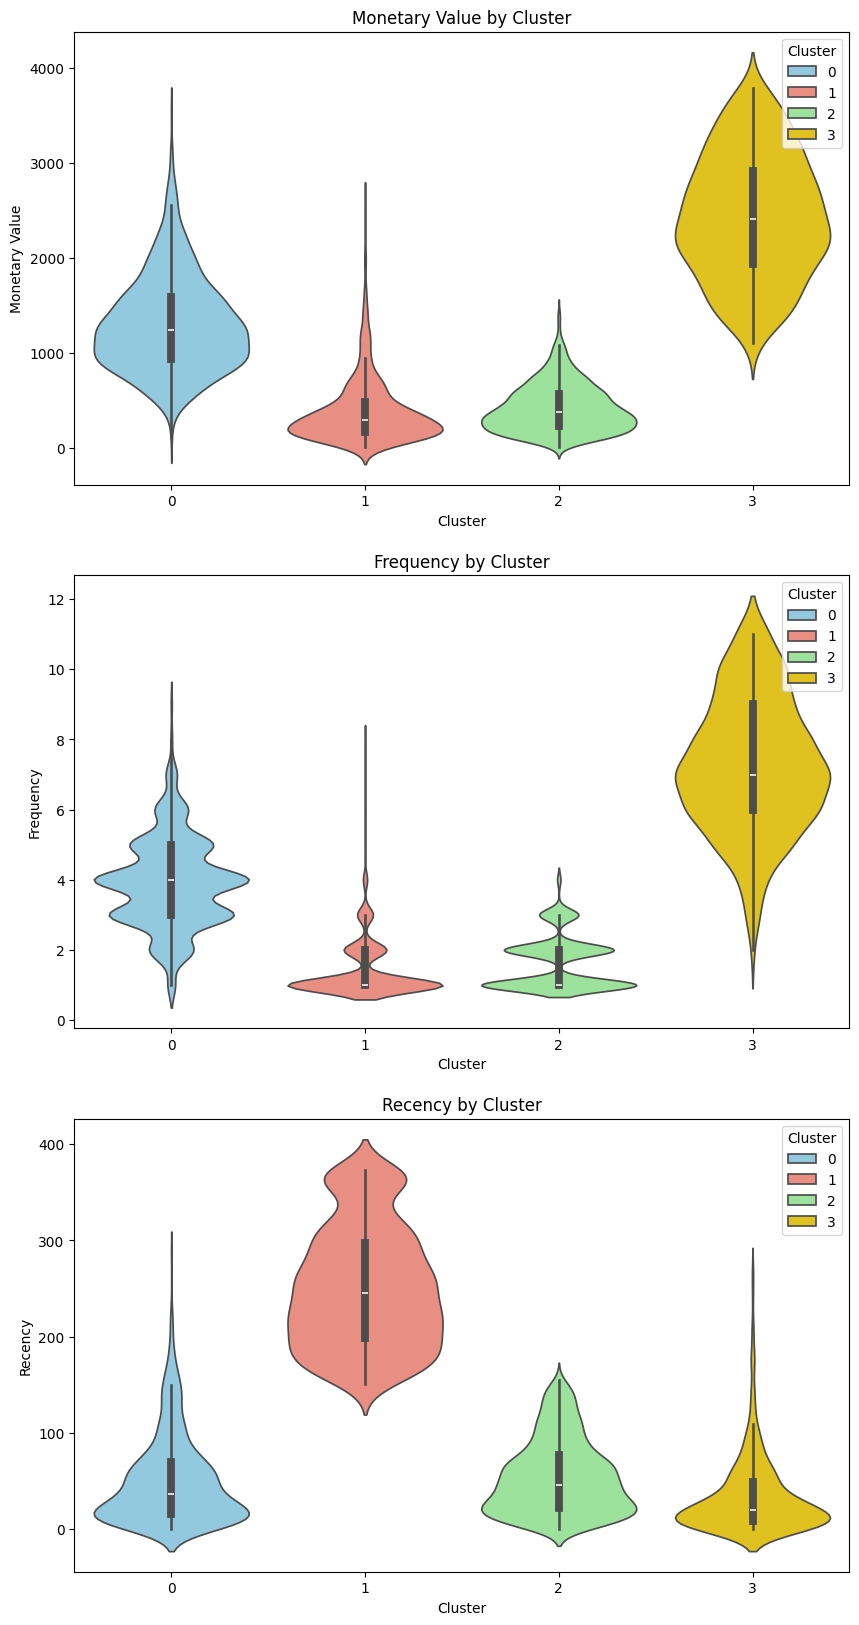

In [39]:
plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["MonetaryValue"], hue=non_outliers_df["Cluster"], palette=color_map)
# sns.violinplot(y=non_outliers_df["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["Frequency"], hue=non_outliers_df["Cluster"], palette=color_map)
# sns.violinplot(y=non_outliers_df["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df["Cluster"], y=non_outliers_df["Recency"], hue=non_outliers_df["Cluster"], palette=color_map)
# sns.violinplot(y=non_outliers_df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.show()

### Summary of the clustered customers
1. **Cluster 0 (Blue): "Loyal"**
    - *Insights:* They spend a reasonable amount, purchase somewhat regularly, and have relatively recent (but not very recent) activity.
    - *Interpretation:* This group shows good potential spending/frequent.
    - *Actions:*
        - Encourage higher engagement such as offer targeted product recommendations, bundle deals, or limited-time offers to increase frequency.
        - Promote loyalty upgrades - if they respond well, they could improve into the VIP segment.

2. **Cluster 1 (Red): "At-risk"**
    - *Insights:* Spend at a moderate or low level, purchase infrequently, and it has been a long time since their last purchase.
    - *Interpretation:* These customers are "at-risk" or "lapsed".
    - *Actions:* 
        - Use reactivation campaigns such as "win-back" offers or limited-time discounts to encourage them to return.
        - Surveys or feedback to understand why they have not been active and address any pain points.

3. **Cluster 2 (Green): "Casual"**
    - *Insights:* They spend less overall, make fewer purchases, and some of their last purchase was not too long ago.
    - *Interpretation:* These customers are more casual buyers or new customers who are not fully engaged yet.
    - *Actions:*
        - Nudge more frequent purchases such as via gentle reminders, personalized promotions, or email campaigns to build a habit.
        - Introductory loyalty tiers, demonstrate value so they move from occasional to more regular purchases.

4. **Cluster 3 (Yellow): "VIP"**
    - *Insights:* They spend a lot (high monetary), purchase often (high frequency), and have bought recently (low recency).
    - *Interpretation:* These are the "VIP" customers, the most engaged and valuable group.
    - *Actions:*
        - Reward loyalty with exclusive discounts, VIP programs, or early access to new products.
        - Upsell/cross-sell since they are already highly engaged.
        - Retention programs to ensure they stay active (loyalty tiers, special events)

In [40]:
# Outliers analysis to get new "manual clusters"
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]
monetary_and_frequency_outliers.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
65,12437.00,6834.99,20,2010-11-09 14:46:00,30
84,12471.00,17721.45,44,2010-11-30 14:35:00,9
85,12472.00,10426.48,13,2010-12-05 14:19:00,4
92,12482.00,21941.72,27,2010-05-12 16:51:00,211
126,12540.00,7670.25,15,2010-11-26 10:43:00,13


In [41]:
# Assign number to new clusters
monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1


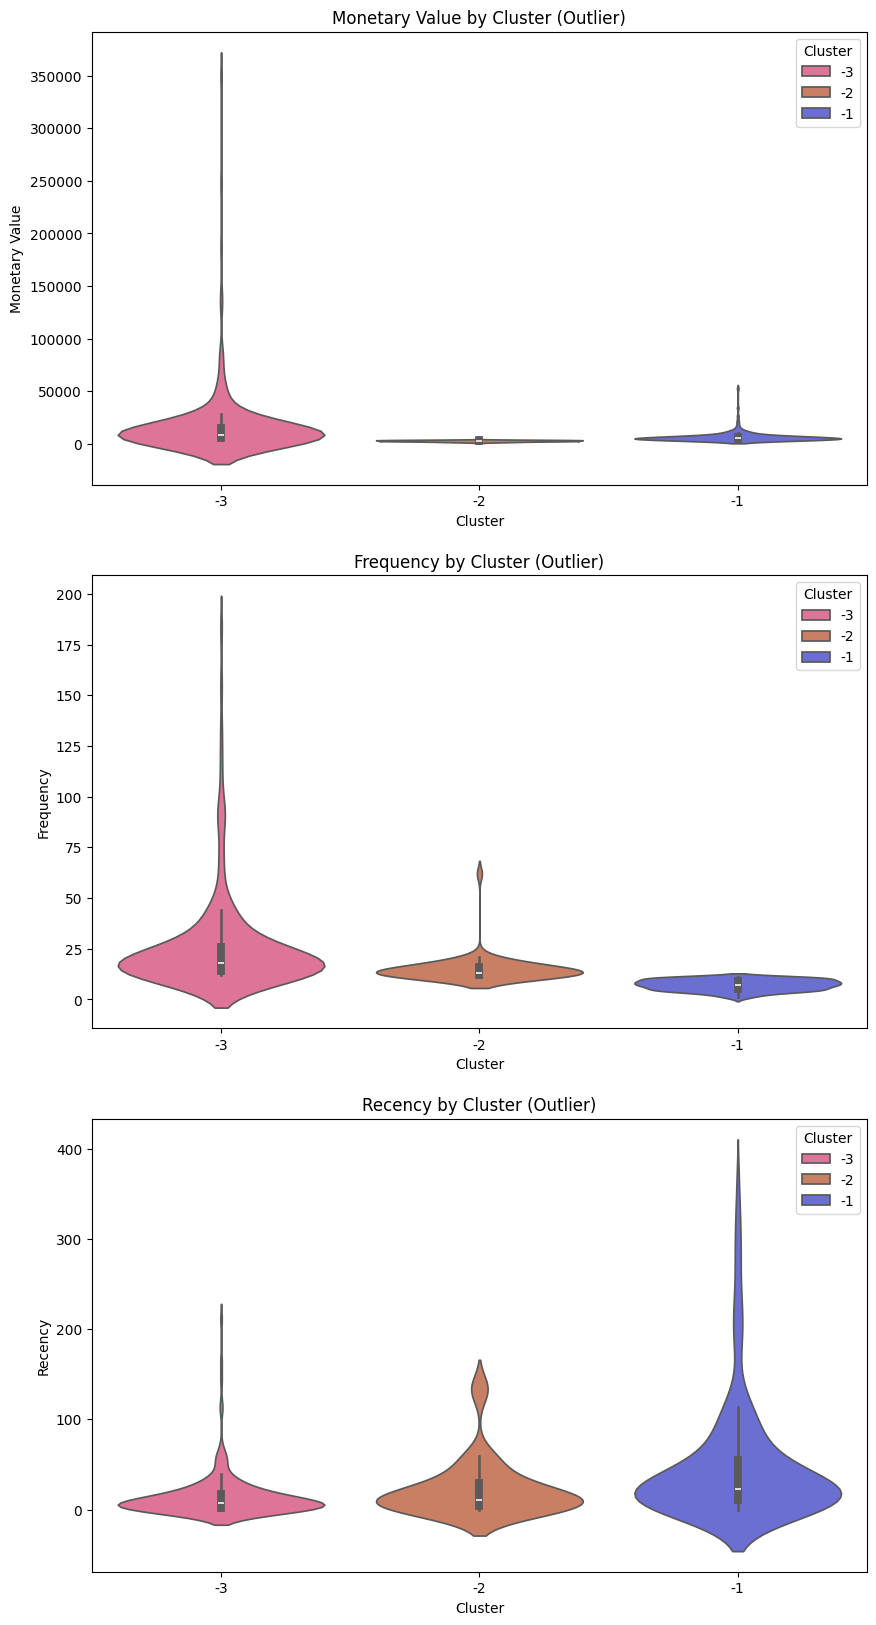

In [43]:
# Plot outliers clusters
outliers_color_map = {
    -1: "#5A5FE3",
    -2: "#D97752",
    -3: "#F06292"
}

plt.figure(figsize=(10, 20))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df["Cluster"], y=outlier_clusters_df["MonetaryValue"], hue=outlier_clusters_df["Cluster"], palette=outliers_color_map)
# sns.violinplot(y=non_outliers_df["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster (Outlier)")
plt.ylabel("Monetary Value")

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df["Cluster"], y=outlier_clusters_df["Frequency"], hue=outlier_clusters_df["Cluster"], palette=outliers_color_map)
# sns.violinplot(y=non_outliers_df["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency by Cluster (Outlier)")
plt.ylabel("Frequency")

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df["Cluster"], y=outlier_clusters_df["Recency"], hue=outlier_clusters_df["Cluster"], palette=outliers_color_map)
# sns.violinplot(y=non_outliers_df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster (Outlier)")
plt.ylabel("Recency")

plt.show()

### Summary of outliers clusters

1. **Cluster -1 (Purple): Monetary Outliers "Luxury"**
    - *Insights:* These customers spend amounts more than usual, but they do not purchase frequently. The recency distribution suggests that some may not have purchased for a while. 
    - *Interpretation:* This group consists of big spenders who may only buy occasionally. They might be business clients, one-time event buyers, or high-end product purchasers.
    - *Actions:*
        - Offer special promotions or event-based discounts to encourage follow-up purchases.
        - Focus on luxury add-ons, extended warranties, or cusomization options.
        - Understand churn risk, offer buyback programs or exclusive comeback offers.

2. **Cluster -2 (Orange): Frequency Outliers "Habitual"**
    - *Insights:* These customers buy very frequently, even more than typical repeat customers. Their monetary value is not necesserily high, meaning they may make small but regular purchases. The recency distribution shows that while some purchase frequently, others have slowed down.
    - *Interpretation:* These customers habitually engage with the business but may not be high spenders.
    - *Actions:* 
        - Encourage bulk purchases with discounts for buying more at once, given their frequent visit.
        - Implement gamification strategies like loyalty points based on purchase frequency.

3. **Cluster -3 (Pink): Monetary & Frequency Outliers "Elite"**
    - *Insights:* These customers spend significantly more and purchase more frequently than others. The distribution indicates some extreme cases of very high spending and purchase frequency. Most of them have low recency values, meaning they purchase recently and regularly.
    - *Interpretation:* This cluster represents the top-tier, highly valuable customers who are deeply engaged with the business. They contribute a large share of revenue and should be nurtured to maintain long-term retention.
    - *Actions:*
        - Provide personalized rewards, discounts, and VIP benefits. 
        - Offer priority support, early access to products, or concierge services.
        - Avoid excessive marketing offers, rather focus on quality engagement rather than quantity.

In [44]:
cluster_labels = {
    0: "LOYAL",
    1: "AT-RISK",
    2: "CASUAL",
    3: "VIP",
    -1: "LUXURY",
    -2: "HABITUAL",
    -3: "ELITE"
}

In [46]:
# Union all clusters
full_clustered_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustered_df.sample(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2870,16356.00,204.10,3,2010-11-28 15:25:00,11,2
3208,16834.00,485.50,1,2010-02-03 14:24:00,309,1
1281,14191.00,132.90,2,2010-11-10 12:27:00,29,2
4125,18061.00,4369.56,19,2010-12-08 13:03:00,1,-3
1827,14919.00,359.35,1,2010-06-18 13:06:00,174,1


In [47]:
full_clustered_df["ClusterLabel"] = full_clustered_df["Cluster"].map(cluster_labels)
full_clustered_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,AT-RISK
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,LOYAL
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,CASUAL
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,LOYAL
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,CASUAL


In [51]:
full_clustered_df.groupby("ClusterLabel")[["Recency", "Frequency", "MonetaryValue"]].mean()

,Recency,Frequency,MonetaryValue
ClusterLabel,,,
AT-RISK,251.17,1.43,384.54
CASUAL,54.07,1.64,417.95
ELITE,14.45,25.87,17147.66
HABITUAL,23.08,15.04,2734.69
LOYAL,49.73,3.91,1308.62
LUXURY,47.91,7.19,6498.45
VIP,33.89,7.24,2436.09


Text(0, 0.5, 'Average Value')

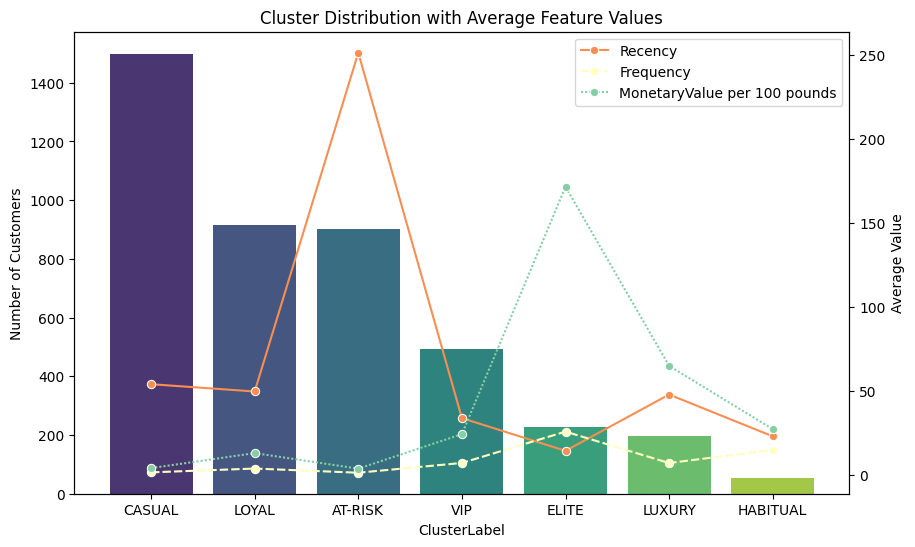

In [71]:
cluster_counts = full_clustered_df["ClusterLabel"].value_counts()
full_clustered_df["MonetaryValue per 100 pounds"] = full_clustered_df["MonetaryValue"] / 100.00
feature_means = full_clustered_df.groupby("ClusterLabel")[["Recency", "Frequency", "MonetaryValue per 100 pounds"]].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette="viridis", hue=cluster_counts.index)
ax1.set_ylabel("Number of Customers")
ax1.set_title("Cluster Distribution with Average Feature Values")

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette="Spectral", marker="o")
ax2.set_ylabel("Average Value")

### Summary of the Data
1. **Cluster Distribution (Bar Chart)**
    - The CASUAL cluster has the highest number of customers, indicating a large group of low-engagement buyers.
    - The LOYAL and AT-RISK clusters have similar customer counts, suggesting a balance between retained and potentially churning customers.
    - The VIP, ELITE, and LUXURY clusters have fewer customers, indicating that high-value buyers are a smaller subset.
    - HABITUAL has the lowest number of customers, implying rare but consistent engagement.
2. **Recency (Orange Line)**
    - AT-RISK customers have the highest recency value, meaning they haven’t purchased in a long time and are at risk of churn.
    - LUXURY and VIP customers show moderate recency, meaning they still engage but not as frequently.
    - ELITE and HABITUAL customers have low recency, meaning they are recent and active buyers.
3. **Frequency (Yellow Line)**
    - ELITE customers have the highest frequency, suggesting they purchase often.
    - LOYAL and VIP customers also have relatively high frequency.
    - CASUAL and AT-RISK customers show low frequency, indicating infrequent purchases.
4. **Monetary Value per 100 Pounds (Dotted Green Line)**
    - ELITE customers have the highest monetary value, meaning they spend the most per transaction.
    - LUXURY and VIP customers also show high monetary values but lower than ELITE.
    - CASUAL and AT-RISK clusters have the lowest monetary value, suggesting smaller purchases.